In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
train_loss = pd.read_csv("../model/regex_tox/train_loss")
val_loss = pd.read_csv("../model/regex_tox/val_loss")

losses = pd.merge(train_loss, val_loss, how='outer', on="Epoch")
losses

,Epoch,Training Loss,Validation Loss
0,1,2.7423,2.2457
1,2,2.2442,1.6379
2,3,1.6351,1.0552
3,4,1.0524,0.7754
4,5,0.7760,0.7122
...,...,...,...
95,96,0.0352,0.0805
96,97,0.0342,0.0804
97,98,0.0332,0.0803
98,99,0.0323,0.0802


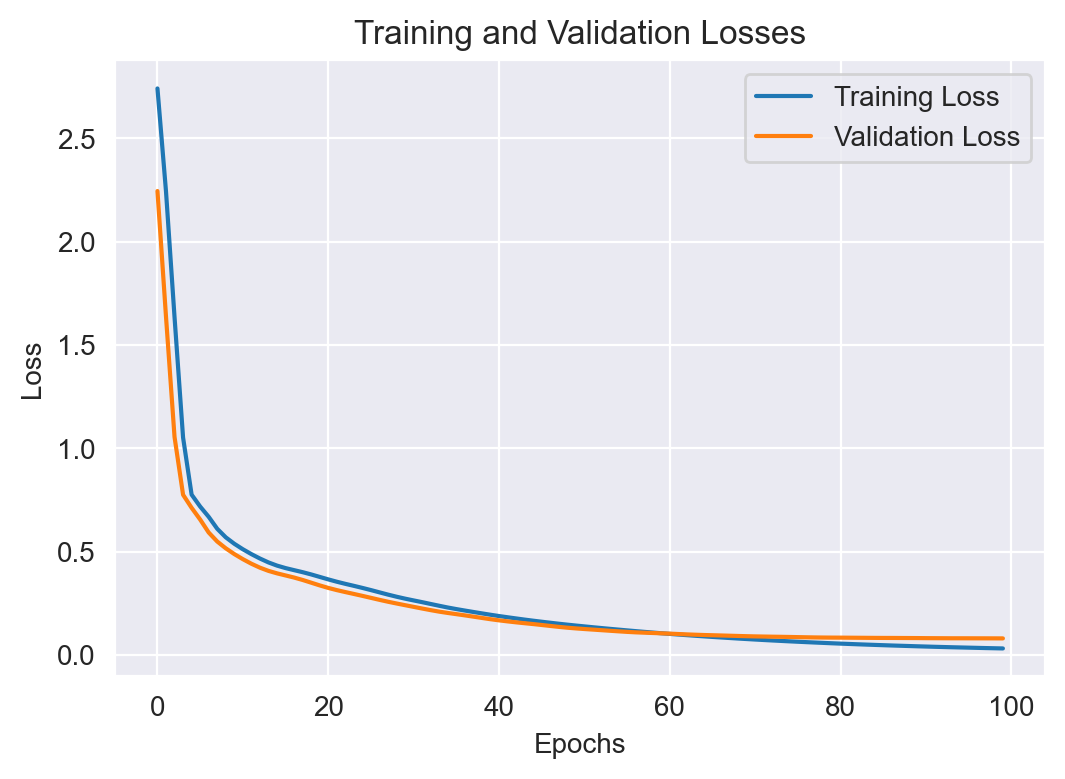

In [12]:
plt.figure(figsize=(6, 4), dpi=200) 

plt.plot(losses["Training Loss"])
plt.plot(losses["Validation Loss"])
plt.legend(["Training Loss", "Validation Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Losses")

plt.savefig("supp_plots/losses.png")

In [22]:
with open('../model/regex_tox/class_metrics', 'r') as f:
    lines = f.read()

classes = []
precisions = []
recalls = []
f1_scores = []

pattern = r"Class:\s*(.*?)\s*Precision:\s*(\d+\.\d+)\s*Recall:\s*(\d+\.\d+)\s*F1-score:\s*(\d+\.\d+)"
matches = re.findall(pattern, lines)

for match in matches:
    classes.append(match[0])
    precisions.append(float(match[1]))
    recalls.append(float(match[2]))
    f1_scores.append(float(match[3]))

df = pd.DataFrame({
    'Class': classes,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

In [57]:
df = df.round(2)
df

,Class,Precision,Recall,F1-score
0,antimicrobial_peptide,1.00,1.00,1.00
1,bradykinin_related,0.78,0.88,0.82
2,cationic_peptide,0.67,0.80,0.73
3,conotoxin,0.87,0.81,0.84
4,mcd_related,0.67,0.86,0.75
5,metalloproteinase,1.00,1.00,1.00
6,neurotoxin,0.83,0.93,0.88
7,nontox,1.00,0.99,1.00
8,other toxins,1.00,0.88,0.93
9,phospholipase_a2,1.00,1.00,1.00


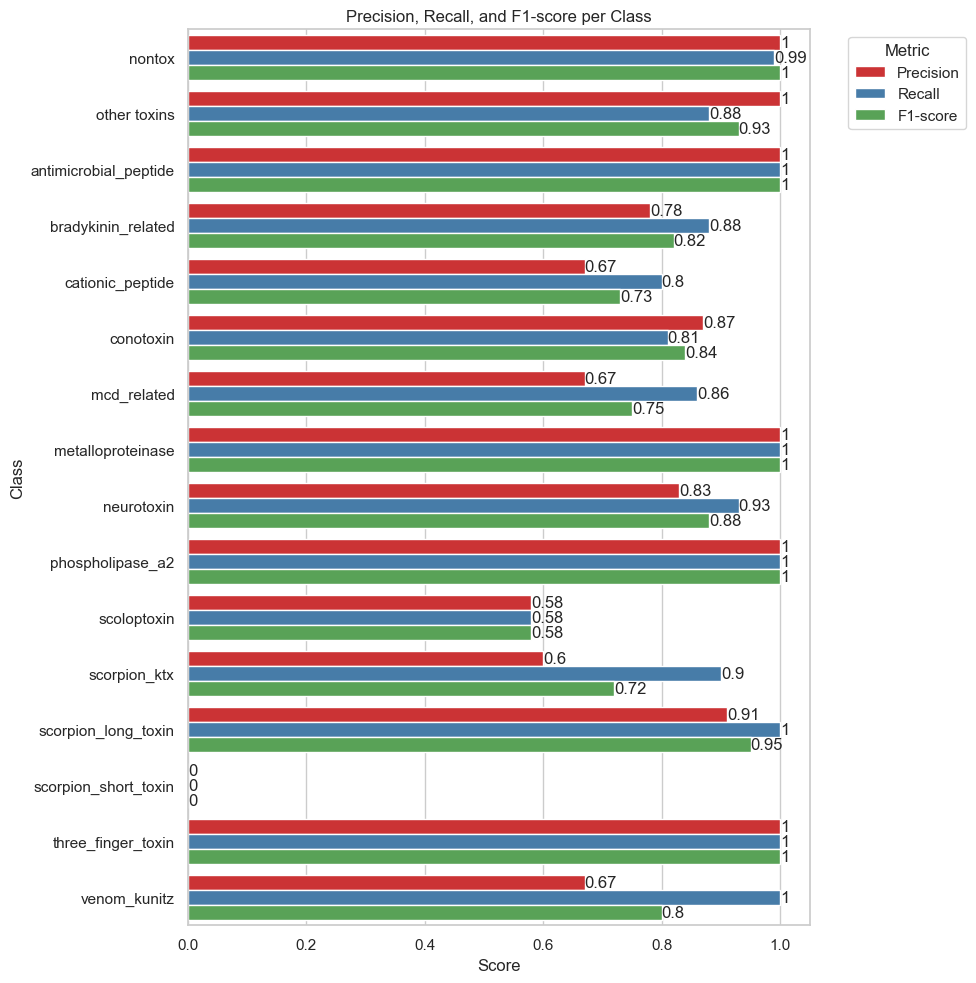

In [60]:
class_order = ['nontox', 'other toxins'] + [cls for cls in df['Class'] if cls not in ['nontox', 'other toxins']]

df_melted = df.melt(id_vars="Class", value_vars=["Precision", "Recall", "F1-score"],
                    var_name="Metric", value_name="Score")

sns.set(style="whitegrid")

plt.figure(figsize=(10, 10))
ax = sns.barplot(x="Score", y="Class", hue="Metric", data=df_melted, palette="Set1", orient='h', order=class_order)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.ylabel('Class')
plt.xlabel('Score')
plt.title('Precision, Recall, and F1-score per Class')

plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("supp_plots/class_metrics.png", dpi=200)

In [61]:
with open('../model/clustered_transformation/class_metrics', 'r') as f:
    lines = f.read()

classes = []
precisions = []
recalls = []
f1_scores = []

pattern = r"Class:\s*(.*?)\s*Precision:\s*(\d+\.\d+)\s*Recall:\s*(\d+\.\d+)\s*F1-score:\s*(\d+\.\d+)"
matches = re.findall(pattern, lines)

for match in matches:
    classes.append(match[0])
    precisions.append(float(match[1]))
    recalls.append(float(match[2]))
    f1_scores.append(float(match[3]))

df = pd.DataFrame({
    'Class': classes,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

In [62]:
df = df.round(2)
df

,Class,Precision,Recall,F1-score
0,Bradykinin-potentiating peptide family,1.00,1.00,1.00
1,Conotoxin A superfamily,0.33,1.00,0.50
2,Conotoxin M superfamily,1.00,1.00,1.00
3,Conotoxin O1 superfamily,1.00,0.67,0.80
4,Conotoxin O2 superfamily,1.00,1.00,1.00
5,"Latarcin, Cytoinsectotoxin family",1.00,1.00,1.00
6,Long scorpion toxin superfamily,0.89,1.00,0.94
7,Natriuretic peptide family,1.00,0.33,0.50
8,Neurotoxin 14 (magi-1) family,1.00,1.00,1.00
9,Phospholipase A2 family,1.00,1.00,1.00


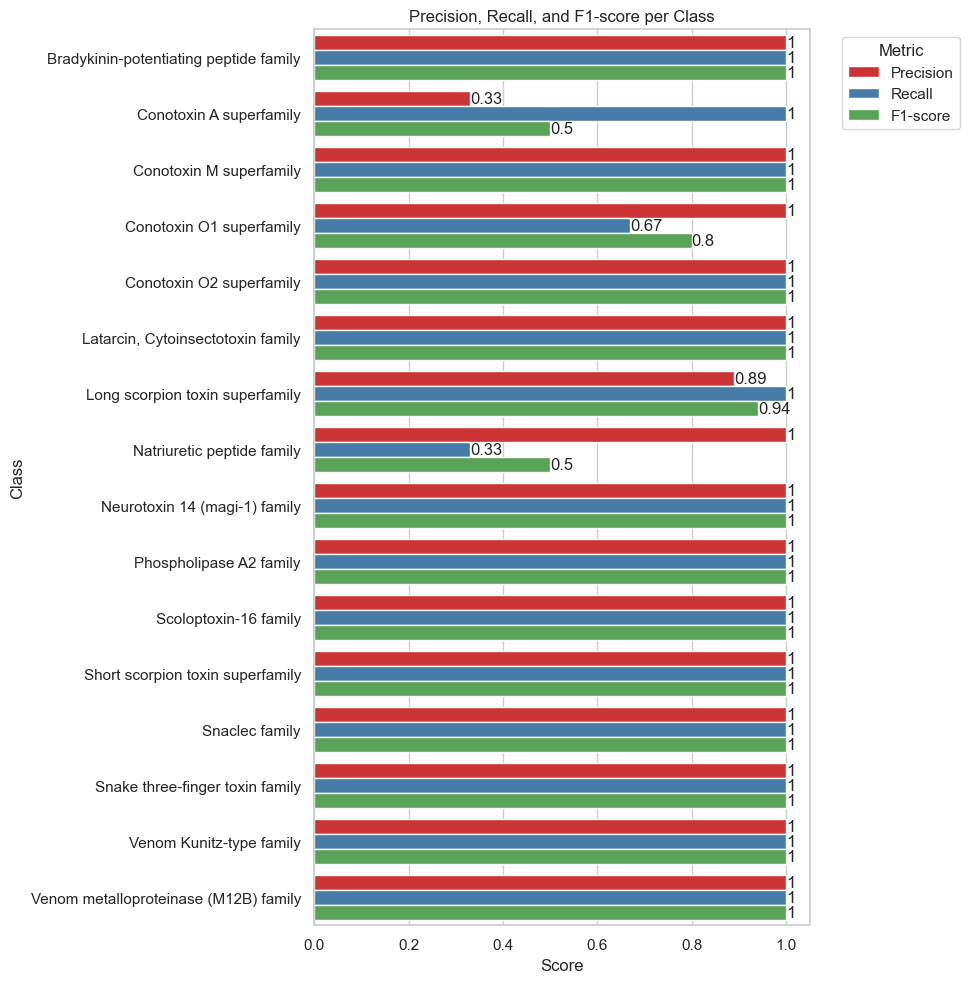

In [63]:
df_melted = df.melt(id_vars="Class", value_vars=["Precision", "Recall", "F1-score"],
                    var_name="Metric", value_name="Score")

sns.set(style="whitegrid")

plt.figure(figsize=(10, 10))
ax = sns.barplot(x="Score", y="Class", hue="Metric", data=df_melted, palette="Set1", orient='h')
for i in ax.containers:
    ax.bar_label(i,)
    
plt.ylabel('Class')
plt.xlabel('Score')
plt.title('Precision, Recall, and F1-score per Class')

plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("supp_plots/manual_class_metrics.png", dpi=200)